<a href="https://colab.research.google.com/github/Anshit-hub/WordForThought/blob/main/Week%202/Anshit_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
animal_data_folder = '/content/animal_data'
class_folders = os.listdir(animal_data_folder)
img_width, img_height = 150, 150
batch_size = 100
num_classes = 15

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    animal_data_folder,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 1561 images belonging to 15 classes.


In [6]:
validation_generator = train_datagen.flow_from_directory(
    animal_data_folder,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 383 images belonging to 15 classes.


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           7,695 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,041,359 (72.64 MB)

 Trainable params: 19,041,359 (72.64 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.1142 - loss: 2.7386 - val_accuracy: 0.2800 - val_loss: 2.3667
Epoch 2/10
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1:27 6s/step - accuracy: 0.2900 - loss: 2.2627

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.2900 - loss: 2.2627 - val_accuracy: 0.2289 - val_loss: 2.3954
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step - accuracy: 0.2879 - loss: 2.2270 - val_accuracy: 0.3133 - val_loss: 2.1323
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 800ms/step - accuracy: 0.3900 - loss: 1.8805 - val_accuracy: 0.3253 - val_loss: 2.0223
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 125s 6s/step - accuracy: 0.4609 - loss: 1.7388 - val_accuracy: 0.3467 - val_loss: 2.0336
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.5082 - loss: 1.7089 - val_accuracy: 0.3855 - val_loss: 1.8888
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 138s 6s/step - accuracy: 0.5905 - loss: 1.4107 - val_accuracy: 0.3700 - val_loss: 2.1111
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.5800 - loss: 1.4742 - val_accuracy: 0.3976 - val_loss: 2.1252
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 130s 6s/step - accuracy: 0.7167 - loss: 1.0356 - val_accuracy: 0.4033 - val_loss:

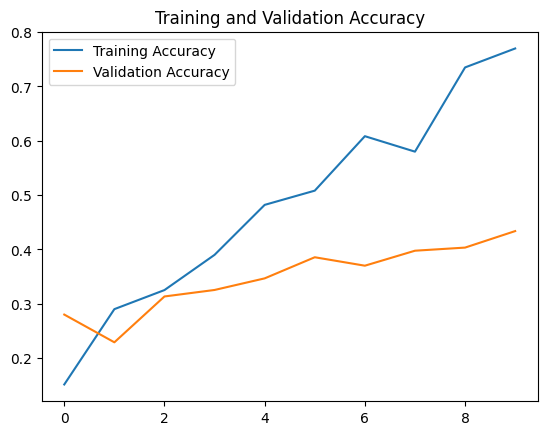

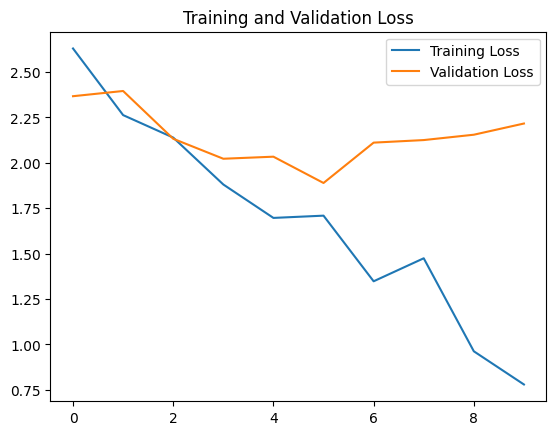

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [12]:
test_loss, test_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3804 - loss: 2.2741
Test Loss: 2.2248153686523438
Test Accuracy: 0.3933333456516266


In [13]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(validation_generator, steps= validation_generator.samples // batch_size)

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


In [18]:
predictions[0]

array([0.06516711, 0.06239537, 0.0687871 , 0.08189875, 0.06943525,
       0.06323059, 0.06232933, 0.07651268, 0.06313436, 0.0655154 ,
       0.06441493, 0.06715886, 0.06382757, 0.06372645, 0.06246608],
      dtype=float32)

In [19]:
np.argmax(predictions[0])

3